<a href="https://colab.research.google.com/github/ghanalk1/Automobile-Price-Prediction/blob/main/Automobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing libraries and data**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = '/content/drive/MyDrive/dat/automobile_data.csv'
auto = pd.read_csv(url)

In [3]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
auto.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# **2. Preprocessing**

In [5]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
auto.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


### ***Getting rid of '?' values***

In [7]:
# finding '?' values
auto.loc[auto['bore'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,?,?,9.4,135,6000,16,23,15645


In [8]:
auto.loc[auto['stroke'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,?,?,9.4,135,6000,16,23,15645


### *The '?' values in bore and stroke correspond to mazda cars. So, we are taking a look at all mazda columns to get better sense of the situation.*

In [9]:
auto[auto['make'] == 'mazda']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
50,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195
51,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6095
52,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795
53,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695
54,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,?,?,9.4,135,6000,16,23,15645
59,1,129,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845


### *After going through the data provided above and reading about bore and stroke, I decided to replace '?' bore values with 3.76 and bore with 3.16*

In [10]:
# replacing '?' in columns bore and stroke
for i in range(55, 59):
  auto.loc[i, 'bore'] = 3.76
  auto.loc[i, 'stroke'] = 3.16

### *peak rpm and horsepower also having '?' values*

In [11]:
auto[auto['peak-rpm'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895


In [12]:
auto[auto['horsepower'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895


### *replacing horsepower '?' values with 100 and peak rpm with 5000*

In [13]:
# replacing '?' in columns bore and stroke
for i in range(130, 132):
  auto.loc[i, 'horsepower'] = 100
  auto.loc[i, 'peak-rpm'] = 5000

### *Doing the same for num of doors*

In [14]:
auto[auto['num-of-doors'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,?,mazda,diesel,std,?,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [15]:
auto.loc[27, 'num-of-doors'] = 4
auto.loc[63, 'num-of-doors'] = 4

In [16]:
# changing the data type of peak rpm, horsepower, stroke and bore
auto['horsepower'] = auto['horsepower'].astype(int)

In [17]:
auto['peak-rpm'] = auto['peak-rpm'].astype(int)

In [18]:
auto['stroke'] = auto['stroke'].astype(float)

In [19]:
auto['bore'] = auto['bore'].astype(float)

### *Doing the same for price*

In [20]:
auto[auto['price'] == '?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [21]:
# taking a look at horsepower of different cars, to get an idea about their price
auto[auto['horsepower'] >= 150].head(15).head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [22]:
# checking price for sedan with less than 100hp
auto[(auto['body-style'] == 'sedan') & (auto['horsepower'] < 100)].head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
20,0,81,chevrolet,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6575
25,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692
26,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,7609


In [23]:
# checking price for hatchback with more than 150hp
auto[(auto['body-style'] == 'hatchback') & (auto['horsepower'] > 150)].head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
75,1,?,mercury,gas,turbo,two,hatchback,rwd,front,102.7,...,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503


In [24]:
# checking price for cars with more than 250hp
auto[auto['horsepower'] >= 250].head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
49,0,?,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


### *for cars with 70 horsepower, price = 7000 and for 160 horsepower, price = 19000 and for 288 horsepower, price = 30000*

In [25]:
# for 70hp vehicle
auto.loc[44, 'price'] = 7500
auto.loc[45, 'price'] = 7000

# for 160hp vehicle
auto.loc[9, 'price'] = 19000

# for 288hp vehicle
auto.loc[129, 'price'] = 30000

In [26]:
# changing data type
auto['price'] = auto['price'].astype(int)

### *Doing the same for normalized losses*

In [34]:
auto['normalized-losses'].value_counts()[:10]

?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
Name: normalized-losses, dtype: int64

In [45]:
auto[auto['normalized-losses'] == '?'].head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [42]:
# taking a look at different normalized losses values to get an idea
auto[auto['normalized-losses'] == '161'].head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
76,2,161,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,37,41,5389
77,2,161,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6189
78,2,161,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6669


In [43]:
# taking a look at different normalized losses values to get an idea
auto[auto['normalized-losses'] == '65'].head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
173,-1,65,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,29,34,8948
174,-1,65,toyota,diesel,turbo,four,sedan,fwd,front,102.4,...,110,idi,3.27,3.35,22.5,73,4500,30,33,10698
175,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,9988


### *replacing '?' with 100*

In [46]:
auto.replace({'?': 100}, inplace=True)

### *We could have done much better in this case*

In [48]:
# changing datatype of normalized loss column
auto['normalized-losses'] = auto['normalized-losses'].astype(int)

# **3. Exploratory Data Analysis**

### ***Univariate Analysis***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf2d0a2fd0>,
      dtype=object)

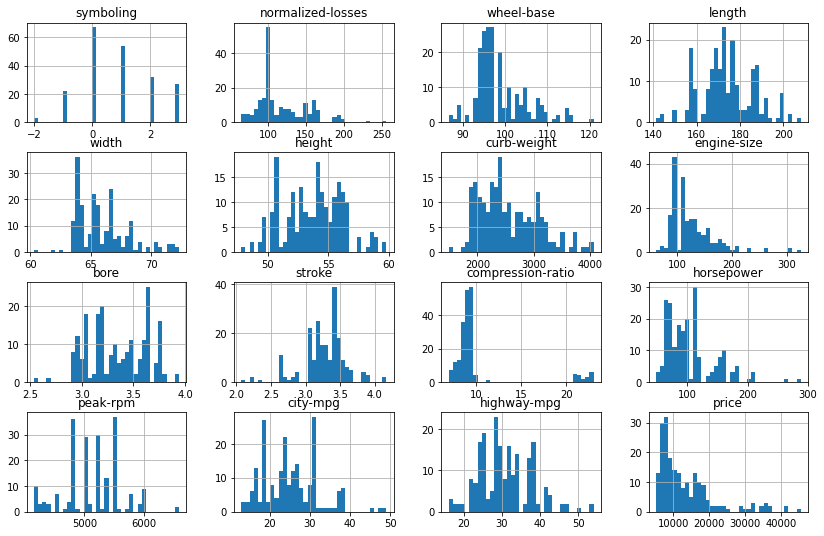

In [58]:
# distributions of all columns
auto.hist(bins=35, figsize=[14,9])

### ***Multivariate Analysis***

### *price vs dimensions*

Text(0.5, 1.0, 'length vs price')

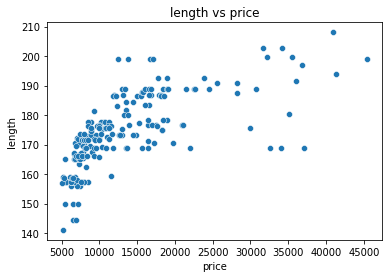

In [91]:
# price variation wrt length
sns.scatterplot(data=auto, x='price', y='length')
plt.title('length vs price')

Text(0.5, 1.0, 'height vs price')

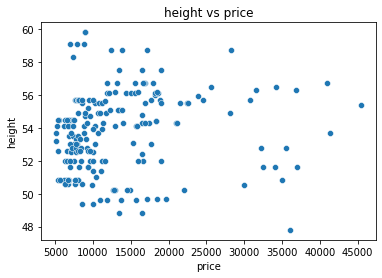

In [86]:
# price variation wrt height
sns.scatterplot(data=auto, x='price', y='height')
plt.title('height vs price')

Text(0.5, 1.0, 'width vs price')

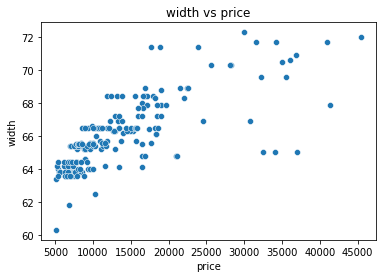

In [92]:
# price variation wrt width
sns.scatterplot(data=auto, x='price', y='width')
plt.title('width vs price')

Text(0.5, 1.0, 'wheel-base vs price')

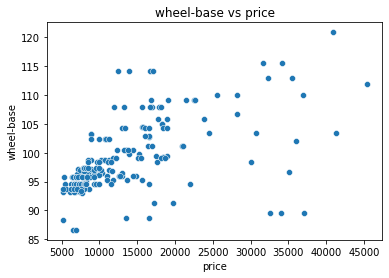

In [93]:
# price variation wrt wheel-base
sns.scatterplot(data=auto, x='price', y='wheel-base')
plt.title('wheel-base vs price')

Text(0.5, 1.0, 'curb-weight vs price')

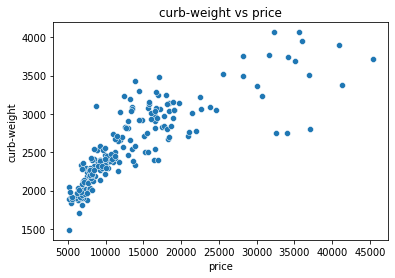

In [88]:
# price variation wrt curb weight
sns.scatterplot(data=auto, x='price', y='curb-weight')
plt.title('curb-weight vs price')

### *price vs performance*

Text(0.5, 1.0, 'horsepower vs price')

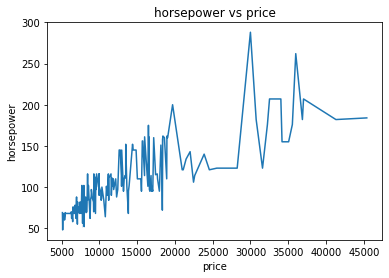

In [80]:
# price variation wrt horsepower
sns.lineplot(data=auto, x='price', y='horsepower')
plt.title('horsepower vs price')

Text(0.5, 1.0, 'engine-size vs price')

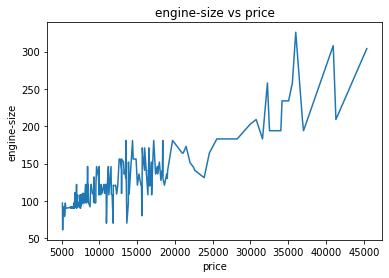

In [81]:
# price variation wrt engine size
sns.lineplot(data=auto, x='price', y='engine-size')
plt.title('engine-size vs price')

Text(0.5, 1.0, 'bore vs price')

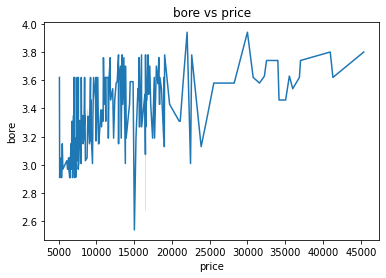

In [95]:
# price variation wrt bore
sns.lineplot(data=auto, x='price', y='bore')
plt.title('bore vs price')

Text(0.5, 1.0, 'stroke vs price')

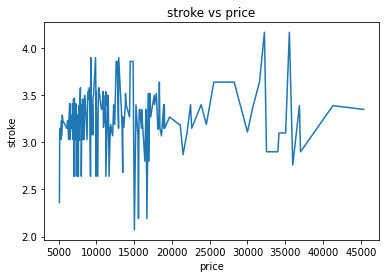

In [97]:
# price variation wrt stroke
sns.lineplot(data=auto, x='price', y='stroke')
plt.title('stroke vs price')

Text(0.5, 1.0, 'city mpg vs price')

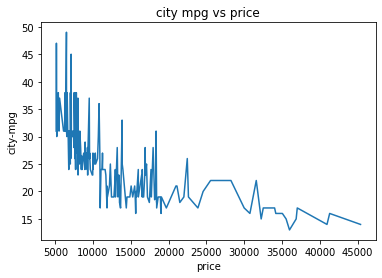

In [98]:
# price variation wrt city mpg
sns.lineplot(data=auto, x='price', y='city-mpg')
plt.title('city mpg vs price')

Text(0.5, 1.0, 'highway mpg vs price')

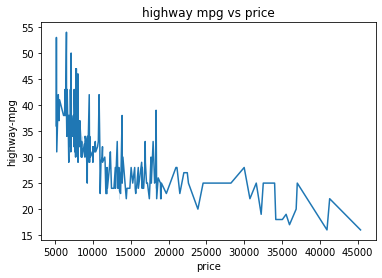

In [99]:
# price variation wrt highway mpg
sns.lineplot(data=auto, x='price', y='highway-mpg')
plt.title('highway mpg vs price')

Text(0.5, 1.0, 'compression-ratio vs price')

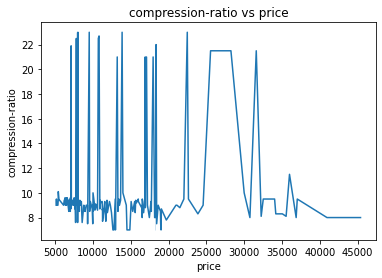

In [100]:
# price variation wrt compression ratio
sns.lineplot(data=auto, x='price', y='compression-ratio')
plt.title('compression-ratio vs price')

Text(0.5, 1.0, 'peak-rpm vs price')

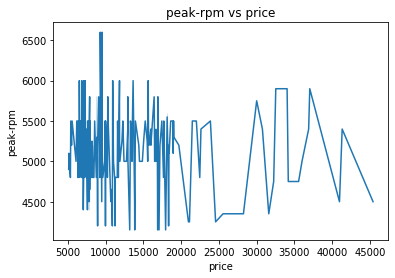

In [101]:
# price variation wrt peak rpm
sns.lineplot(data=auto, x='price', y='peak-rpm')
plt.title('peak-rpm vs price')

Text(0.5, 1.0, 'engine-size vs price')

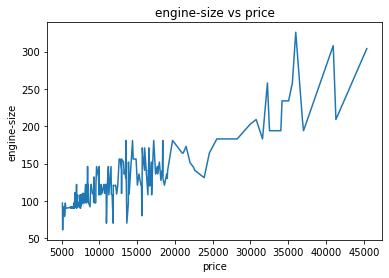

In [123]:
# price variation wrt engine size
sns.lineplot(data=auto, x='price', y='engine-size')
plt.title('engine-size vs price')

### *price vs vehicle style*

In [102]:
auto.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

Text(0.5, 1.0, 'price vs fuel-type')

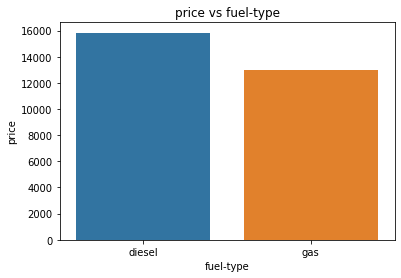

In [113]:
# price variation wrt fuel-type
fuel = auto.groupby('fuel-type')['price'].mean().reset_index()
sns.barplot(data=fuel, x='fuel-type', y='price')
plt.title('price vs fuel-type')

Text(0.5, 1.0, 'price vs aspiration')

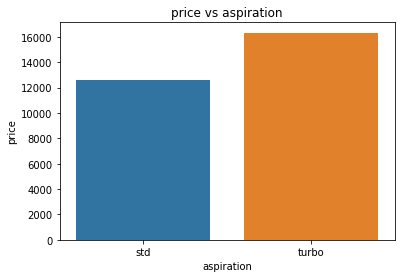

In [115]:
# price variation wrt aspiration
asp = auto.groupby('aspiration')['price'].mean().reset_index()
sns.barplot(data=asp, x='aspiration', y='price')
plt.title('price vs aspiration')

In [117]:
auto['num-of-doors'].value_counts()

four    114
two      89
4         2
Name: num-of-doors, dtype: int64

Text(0.5, 1.0, 'price vs num-of-doors')

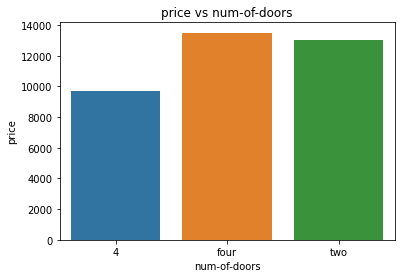

In [116]:
# price variation wrt num of doors
doors = auto.groupby('num-of-doors')['price'].mean().reset_index()
sns.barplot(data=doors, x='num-of-doors', y='price')
plt.title('price vs num-of-doors')

Text(0.5, 1.0, 'price vs body-style')

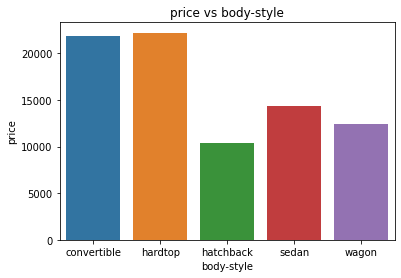

In [118]:
# price variation wrt body style
body = auto.groupby('body-style')['price'].mean().reset_index()
sns.barplot(data=body, x='body-style', y='price')
plt.title('price vs body-style')

Text(0.5, 1.0, 'price vs drive-wheels')

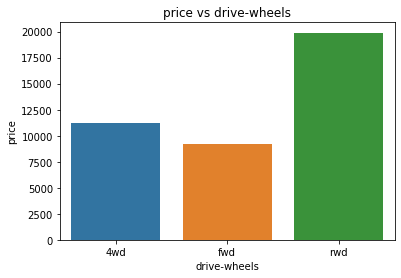

In [119]:
# price variation wrt drive wheels
wheels = auto.groupby('drive-wheels')['price'].mean().reset_index()
sns.barplot(data=wheels, x='drive-wheels', y='price')
plt.title('price vs drive-wheels')

Text(0.5, 1.0, 'price vs engine-location')

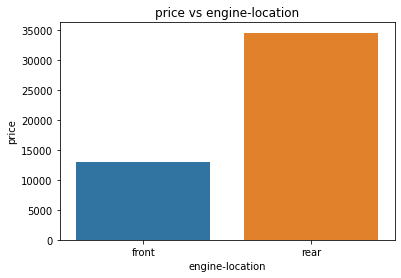

In [120]:
# price variation wrt engine location
engine = auto.groupby('engine-location')['price'].mean().reset_index()
sns.barplot(data=engine, x='engine-location', y='price')
plt.title('price vs engine-location')

Text(0.5, 1.0, 'price vs engine-type')

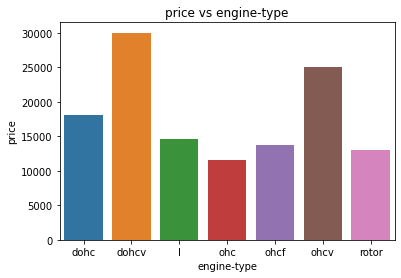

In [121]:
# price variation wrt engine type
engine_type = auto.groupby('engine-type')['price'].mean().reset_index()
sns.barplot(data=engine_type, x='engine-type', y='price')
plt.title('price vs engine-type')

Text(0.5, 1.0, 'price vs num-of-cylinders')

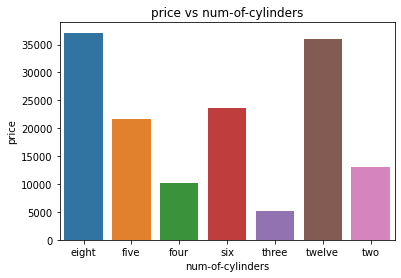

In [126]:
# price variation wrt num of cylinders
engine_size = auto.groupby('num-of-cylinders')['price'].mean().reset_index()
sns.barplot(data=engine_size, x='num-of-cylinders', y='price')
plt.title('price vs num-of-cylinders')

Text(0.5, 1.0, 'price vs fuel-system')

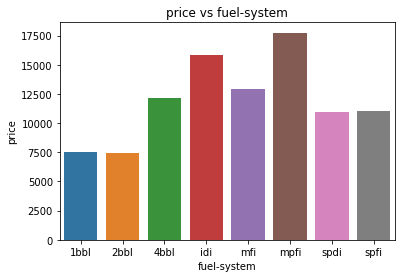

In [127]:
# price variation wrt fuel system
fuel_sys = auto.groupby('fuel-system')['price'].mean().reset_index()
sns.barplot(data=fuel_sys, x='fuel-system', y='price')
plt.title('price vs fuel-system')